## **Sommaire**

1. [Importation des bibliothèques](#importation)
2. [Chargement des données](#chargement)
3. [EDA pour le dataset `employees_survey`](#eda_employees_survey)
    1. [Lecture du dataset](#3_lecture)
    2. [Analyse des données](#3_analyse)
    3. [Détection des valeurs manquantes](#3_manquantes)
    4. [Détection des valeurs dupliquées](#3_dupliquees)
    5. [Nettoyage des données](#3_nettoyage)
    6. [Analyse univariée](#3_univariee)
    7. [Analyse bivariée](#3_bivariee)



---

### 1. <a id='importation'>Importation des bibliothèques</a>

In [21]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime
import time

# Ignorer les avertissements
import warnings
warnings.filterwarnings('ignore')

DELIMITER = "--------------------------------"

---

### 2. <a id='chargement'>Chargement des données</a>

In [22]:
# Chargement des données
path = "../data/"
employees_survey = pd.read_csv(path + "employee_survey_data.csv")
general_data = pd.read_csv(path + "general_data.csv")
in_time = pd.read_csv(path + "in_time.csv")
out_time = pd.read_csv(path + "out_time.csv")
manager_survey = pd.read_csv(path + "manager_survey_data.csv")

---

### 3. <a id='manager_survey_data'>EDA pour le dataset `manager_survey_data`</a>

#### 3.1. <a id='3_lecture'>Lecture du dataset</a>

In [23]:
# Affichage des 5 premières lignes du dataset
print(manager_survey.head())

print(DELIMITER)

# Affichage des 5 dernières lignes du dataset
print(manager_survey.tail())


   EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3
--------------------------------
      EmployeeID  JobInvolvement  PerformanceRating
4405        4406               3                  3
4406        4407               2                  3
4407        4408               3                  4
4408        4409               2                  3
4409        4410               4                  3


#### 3.2. <a id='3_analyse'>Analyse des données</a>

In [24]:
# Informations de base
print("Informations de base :")
manager_survey.info()
print(DELIMITER)

# Sommaire des statistiques
print("Sommaire des statistiques :")
print(manager_survey.describe())

Informations de base :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB
--------------------------------
Sommaire des statistiques :
        EmployeeID  JobInvolvement  PerformanceRating
count  4410.000000     4410.000000        4410.000000
mean   2205.500000        2.729932           3.153741
std    1273.201673        0.711400           0.360742
min       1.000000        1.000000           3.000000
25%    1103.250000        2.000000           3.000000
50%    2205.500000        3.000000           3.000000
75%    3307.750000        3.000000           3.000000
max    4410.000000        4.000000           4.000000


#### 3.3. <a id='3_manquantes'>Détection des valeurs manquantes</a>


In [25]:
# Nombre de valeurs nulles par colonnes
print(manager_survey.isnull().sum())

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64


#### 3.4. <a id='3_dupliquees'>Détection des valeurs dupliquées</a>


In [26]:
print(f"Nombre de valeurs dupliquées : {manager_survey.duplicated().sum()}")

Nombre de valeurs dupliquées : 0


**Résumé du dataset employees_survey**

**Structure générale**
- Nombre de lignes : 4410
- Nombre de colonnes : 3

**Colonnes**
1. *EmployeeID (int64)*
- Identifiant unique pour chaque employé
- Pas de valeurs manquantes

2. *JobInvolvement (int64)*
- Évaluation de son implication dans son travail
- Échelle de 1 à 4
- Pas de valeurs manquantes
- Moyenne : 2.73
- Médiane : 3

3. *PerformanceRating (int64)*
- Évaluation de la performance de chaque employé
- Échelle de 3 à 4
- Pas de valeurs manquantes
- Moyenne : 3.15
- Médiane : 3

**Points notables**
- Pas de valeurs manquantes
- Pas de doublons dans le dataset, donc aucun besoin de gérer ce cas de figure
- Les scores sont tous sur une échelle de 1 à 4
- Aucun manager noté 1 ou 2

#### 3.5. <a id='3_nettoyage'>Nettoyage des données</a>

Pas de valeurs manquantes, donc rien à faire.


#### 3.6. <a id='3_univariee'>Analyse univariée</a>

In [27]:
numerical_columns = manager_survey.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('EmployeeID')
print(numerical_columns)

Index(['JobInvolvement', 'PerformanceRating'], dtype='object')


3.6.1. Histogrammes

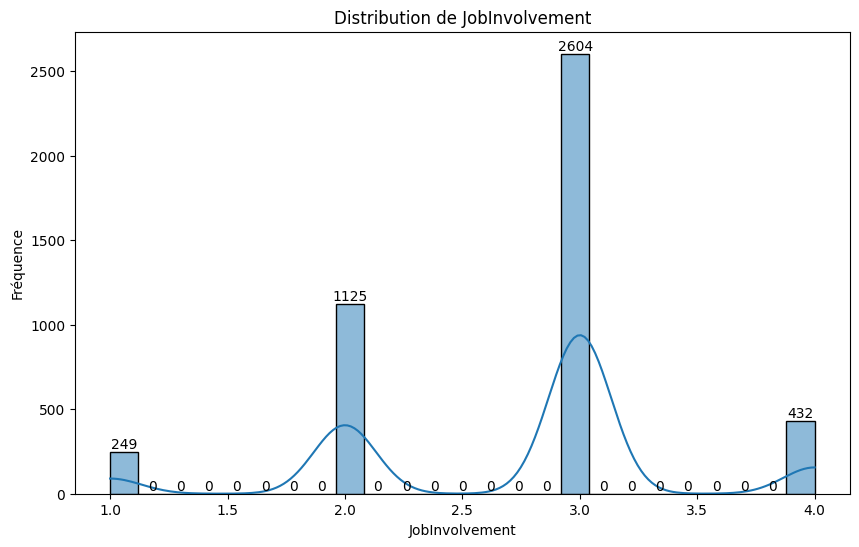

--------------------------------


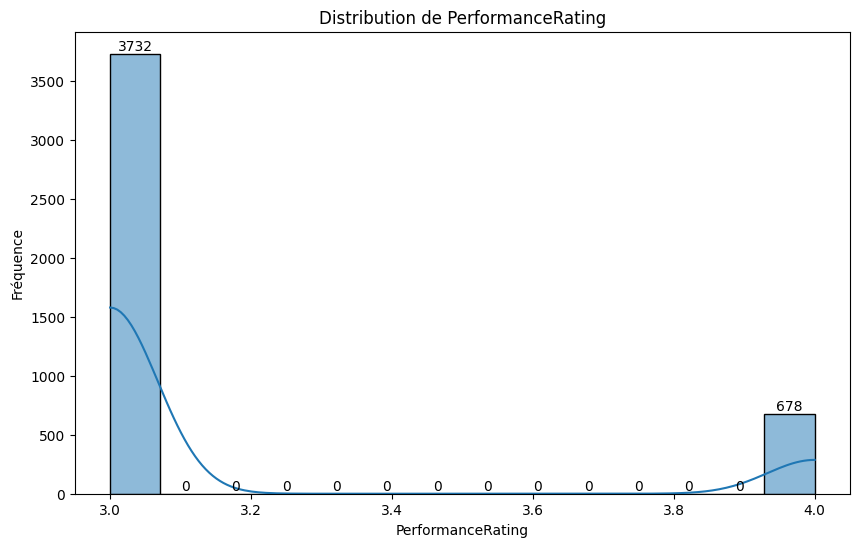

--------------------------------


In [28]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(manager_survey[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

    # Ajouter les valeurs sur le graphe
    for i in ax.containers:
        ax.bar_label(i)

    plt.show()
    print(DELIMITER)

**Observations**
- Pics observés sur le niveau 3 pour les trois métriques
- 5.63% de 1 ; 25.51% de 2 ; 59.05% de 3 ; 9.8% de 4 pour JobInvolvement
- 84.63% de Performance est sur 3, le reste sur 4

=======================================================================================================


3.6.2. Boxplots

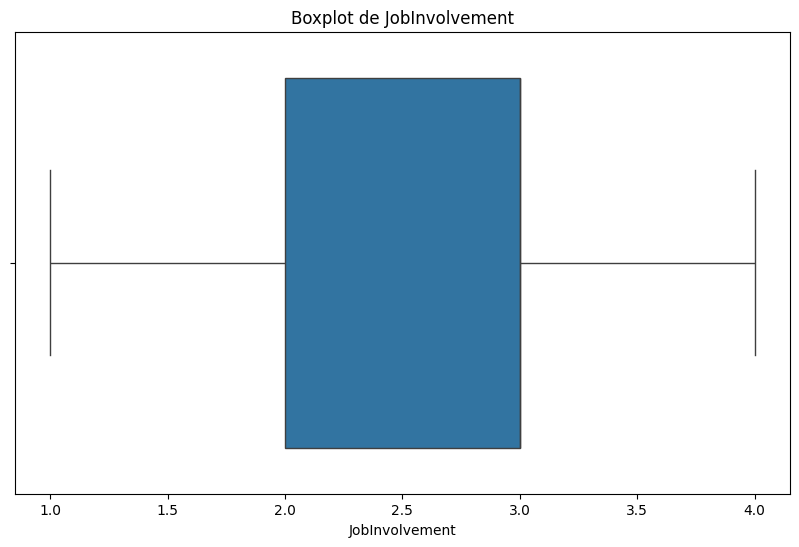

--------------------------------


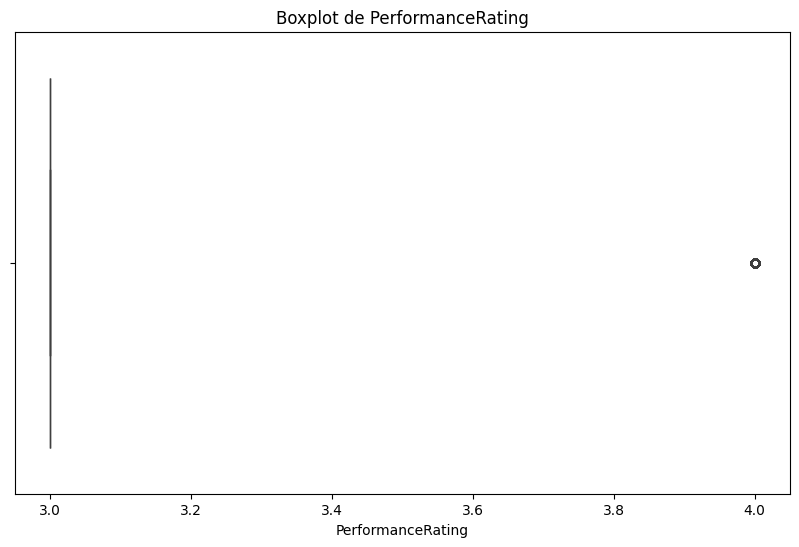

--------------------------------


In [29]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=manager_survey)
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()
    print(DELIMITER)

**Observations**
- JobInvolvement symétrique
- Absence d'outliers (valeurs aberrantes), ce qui suggère des données cohérentes
- PerformanceRating non exploitable

=======================================================================================================

#### <a id='3_bivariee'>3.7. Analyse bivariée</a>

3.7.1. Heatmaps

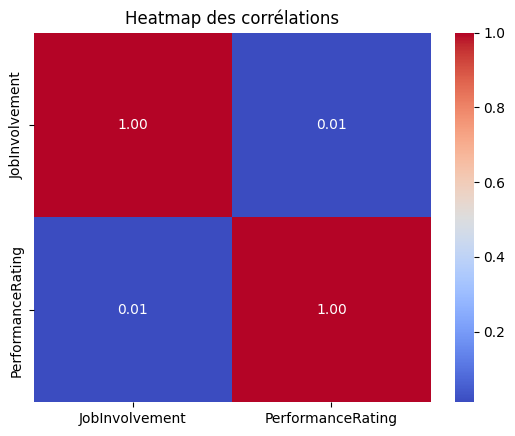

In [30]:
# Calcul de la matrice de corrélation
corr_matrix = manager_survey[['JobInvolvement', 'PerformanceRating']].corr()

# Création de la heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap des corrélations')
plt.show()

**Observations**
- `PerformanceRating` vs `JobInvolvement` -> Corrélation de 0.01 -> Pratiquement aucune relation

=======================================================================================================

3.7.2. Scatterplots

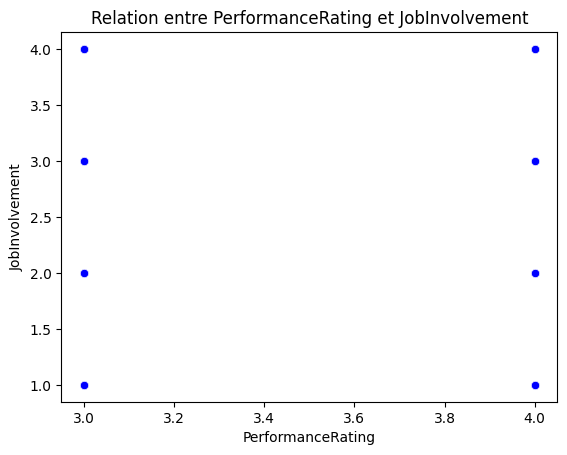

In [31]:
# Scatterplot EnvironmentSatisfaction - JobSatisfaction
sns.scatterplot(data=manager_survey, x='PerformanceRating', y='JobInvolvement', color='blue')
plt.title('Relation entre PerformanceRating et JobInvolvement')
plt.show()

**Observations**
- Aucune forte densité ou tendance apparente entre les deux variables.
- Les données semblent uniformément réparties sans regroupements ou corrélations évidentes.
- Cela pourrait indiquer une indépendance ou une relation faible entre PerformanceRating et JobInvolvement.
=======================================================================================================

3.7.3. Diagrammes de densité bivarié (kdeplots)

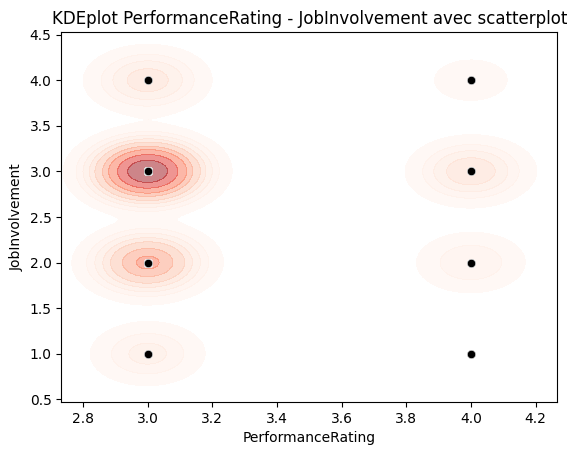

In [32]:
# Kdeplot PerformanceRating - JobInvolvement
sns.kdeplot(x=manager_survey['PerformanceRating'], y=manager_survey['JobInvolvement'], fill=True, cmap="Reds", alpha=0.5)

# Superposition avec un scatterplot pour plus de clarté
sns.scatterplot(x=manager_survey['PerformanceRating'], y=manager_survey['JobInvolvement'], color="black", alpha=0.7)

plt.title("KDEplot PerformanceRating - JobInvolvement avec scatterplot")
plt.show()


**Observations**
- Forte densité autour de PerformanceRating = 3 et JobInvolvement = 3.
- Densité beaucoup plus faible pour les valeurs extrêmes.
- Points noirs indiquant des valeurs discrètes (variables ordinales).
- Contours rouges plus intenses correspondant aux zones de forte densité.
- Absence de données dans certaines combinaisons (PerformanceRating = 4 et JobInvolvement = 1).
- Légère tendance des valeurs élevées de PerformanceRating à être associées à des valeurs élevées de JobInvolvement.
- Répartition principalement centrée sur JobInvolvement = 3.

--------